
# Shark Attacks

In [95]:
#Importing the relevant libraries.
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt

In [11]:
#RAW FOLDER - Shark Attack
shark_csv_folder = pd.read_csv("INPUT/GSAF5.csv",encoding='latin1')
shark_csv_folder.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN


In [12]:
#Checking the shape of the folder.
shark_csv_folder.shape

(5992, 24)

In [13]:
#RAW FOLDER - Shark Attack (OUTPUT FOLDER)
shark_output = pd.read_csv("OUTPUT/GSAF5.csv",encoding='latin1')
shark_output.head()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,13h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,...,N,11h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,10h43,0,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,...,N,0,0,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,...,N,0,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989


In [56]:
#Removing two last columns. They did not have relevant information for our purpose.
shark_output=shark_output.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [57]:
#Comparing the amendments. The columns were removed.
print(shark_csv_folder.shape)
print(shark_output.shape)

(5992, 24)
(5992, 23)


In [58]:
#Checking what is the type of the columns in order to know how can we work on them.
shark_output.dtypes

Unnamed: 0                 int64
Case Number               object
Date                      object
Year                      object
Type                      object
Country                   object
Area                      object
Location                  object
Activity                  object
Name                      object
Sex                       object
Age                       object
Injury                    object
Fatal (Y/N)               object
Time                      object
Species                   object
Investigator or Source    object
pdf                       object
href formula              object
href                      object
Case Number.1             object
Case Number.2             object
original order             int64
dtype: object

In [59]:
#Removing whitespaces from header.
shark_output.rename(columns=lambda x: x.strip())

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,13h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,...,N,11h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,10h43,0,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,...,N,0,0,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,...,N,0,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,5987,ND.0005,Before 1903,OUT OF SCOPE,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,Y,0,0,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,5988,ND.0004,Before 1903,OUT OF SCOPE,Unprovoked,AUSTRALIA,Western Australia,0,Pearl diving,Ahmun,...,Y,0,0,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,5989,ND.0003,1900-1905,OUT OF SCOPE,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,Y,0,0,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,5990,ND.0002,1883-1889,OUT OF SCOPE,Unprovoked,PANAMA,0,"Panama Bay 8ÂºN, 79ÂºW",0,Jules Patterson,...,Y,0,0,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [60]:
#Checking if the white spaces have been removed from header. 
shark_output.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula',
       'href', 'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [61]:
#Removing white spaces from Country Column.
shark_output['Country']=shark_output['Country'].str.strip()

In [62]:
#Removing ? from Country Column.
shark_output['Country']=shark_output['Country'].str.replace("?",'')

In [63]:
#Removing the empty cells. 
shark_output=shark_output.fillna(0)
display(shark_output)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,13h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993
1,1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,...,N,11h00,0,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992
2,2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,...,N,10h43,0,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991
3,3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,...,N,0,0,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990
4,4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,...,N,0,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5987,5987,ND.0005,Before 1903,OUT OF SCOPE,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,...,Y,0,0,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6
5988,5988,ND.0004,Before 1903,OUT OF SCOPE,Unprovoked,AUSTRALIA,Western Australia,0,Pearl diving,Ahmun,...,Y,0,0,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5
5989,5989,ND.0003,1900-1905,OUT OF SCOPE,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,...,Y,0,0,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4
5990,5990,ND.0002,1883-1889,OUT OF SCOPE,Unprovoked,PANAMA,0,"Panama Bay 8ÂºN, 79ÂºW",0,Jules Patterson,...,Y,0,0,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3


In [64]:
#Re-naming all the names that are nok in Country Column.

for i in range(len(shark_output)):
    dicc1={'NEW BRITAIN':'PAPUA NEW GUINEA',
           'ENGLAND':'UNITED KINGDOM', 
           'SCOTLAND':'UNITED KINGDOM',
           'WESTERN SAMOA':'SAMOA',
           'ST. MAARTIN':'SAINT MARTIN', 
           'ST. MARTIN':'SAINT MARTIN',
           'ST. HELENA':'SAINT HELENA',
           'ST HELENA':'SAINT HELENA'
          }
    
    for x,y in dicc1.items(): 
            shark_output['Country'].values[i] = shark_output['Country'].values[i].replace(x, y)

shark_output['Country']

for i in range(len(shark_output)):
    dicc2={'BURMA':'MYANMAR',
           'Sierra Leone':'SIERRA LEONE', 
           'NORTHERN MARIAN ISLANDS':'MARIANA ISLANDS',
           'FALKLAND ISLANDS':'MALDIVES',
           'MALDIVE ISLANDS':'MALDIVES',
           'OKINAWA':'JAPAN',
           'CRETE':'GREECE',
           'Fiji':'FIJI',
           'TAIWAN':'CHINA',
           'GRAND CAYMAN':'CAYMAN ISLANDS',
           'CAPE VERDE':'CABO VERDE',
           'Seychelles':'SHEYCHELLES'
          }
    
    for x,y in dicc2.items(): 
            shark_output['Country'].values[i] = shark_output['Country'].values[i].replace(x, y)

shark_output['Country']


shark_output.Country=shark_output.Country.str.replace(r"(.*)?SEA(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?OCEAN(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?/(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?GULF(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?BAY(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?TERRITORIES(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"ASIA",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?Coast(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?Between(.*)?",'OUT OF SCOPE')
shark_output.Country=shark_output.Country.str.replace(r"(.*)?BALNKA(.*)?",'OUT OF SCOPE')


shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?SRI LANKA(.*)?",'SRI LANKA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?UAE(.*)?",'UNITED ARAB EMIRATES')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?ANDAMAN(.*)?",'INDIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)? GUINEA(.*)?",'PAPUA NEW GUINEA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?MICRONESIA(.*)?",'MICRONESIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?RUSSIA(.*)?",'RUSSIA')
shark_output['Country']=shark_output['Country'].str.replace(r"(.*)?SYRIAN(.*)?",'SYRIAN ARAB REPUBLIC')

In [65]:
#Checking columns.
shark_output["Country"].value_counts()

USA                         2116
AUSTRALIA                   1279
SOUTH AFRICA                 565
OUT OF SCOPE                 155
PAPUA NEW GUINEA             153
                            ... 
ALGERIA                        1
SYRIAN ARAB REPUBLIC           1
SLOVENIA                       1
NORTHERN MARIANA ISLANDS       1
DIEGO GARCIA                   1
Name: Country, Length: 142, dtype: int64

In [66]:
#Checking what are the remaining null values.
a=shark_output.isnull().sum()[shark_output.isnull().sum()>0]

In [67]:
#Removing the remaining null values.
shark={'Country':'OUT OF SCOPE'}
shark_output.fillna(value=shark,inplace=True)

In [68]:
a=shark_output.isnull().sum()[shark_output.isnull().sum()>0]

In [69]:
#Removing white spaces from Year Column.
shark_output["Year"] = shark_output["Year"].astype(str)
shark_output['Year']= shark_output['Year'].str.strip()

In [70]:
#Cleaning Year Column.
for e in shark_output.Year:
    if e <'1300':
        shark_output.Year=shark_output.Year.replace(e, 'OUT OF SCOPE')

In [71]:
shark_output.to_csv('OUTPUT/v1_GSAF5.csv')

# HUMAN DEVELOPMENT INDEX DF

In [72]:
#Opening the Human Development Index in order to extract the TOP20 Developed countries for our analysis.
hdi = pd.read_csv("OUTPUT/Human Development Index (HDI).csv",encoding='latin1')
hdi.head()

,Human Development Index (HDI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58
0,HDI Rank (2018),Country,1990,NaN,1991,NaN,1992,NaN,1993,NaN,...,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN,2018
1,1,Norway,0.85,NaN,0.856,NaN,0.862,NaN,0.87,NaN,...,NaN,0.945,NaN,0.948,NaN,0.951,NaN,0.953,NaN,0.954
2,2,Switzerland,0.832,NaN,0.834,NaN,0.836,NaN,0.841,NaN,...,NaN,0.939,NaN,0.943,NaN,0.943,NaN,0.943,NaN,0.946
3,3,Ireland,0.764,NaN,0.767,NaN,0.772,NaN,0.781,NaN,...,NaN,0.92,NaN,0.926,NaN,0.936,NaN,0.939,NaN,0.942
4,4,Germany,0.801,NaN,0.809,NaN,0.814,NaN,0.824,NaN,...,NaN,0.93,NaN,0.933,NaN,0.936,NaN,0.938,NaN,0.939


In [73]:
#Deleting first row.
hdi.columns = hdi.iloc[0]
hdi = hdi.reindex(hdi.index.drop(0)).reset_index(drop=True)
hdi.columns.name = None
hdi

,HDI Rank (2018),Country,1990,NaN,1991,NaN,1992,NaN,1993,NaN,...,NaN,2014,NaN,2015,NaN,2016,NaN,2017,NaN,2018
0,1,Norway,0.85,NaN,0.856,NaN,0.862,NaN,0.87,NaN,...,NaN,0.945,NaN,0.948,NaN,0.951,NaN,0.953,NaN,0.954
1,2,Switzerland,0.832,NaN,0.834,NaN,0.836,NaN,0.841,NaN,...,NaN,0.939,NaN,0.943,NaN,0.943,NaN,0.943,NaN,0.946
2,3,Ireland,0.764,NaN,0.767,NaN,0.772,NaN,0.781,NaN,...,NaN,0.92,NaN,0.926,NaN,0.936,NaN,0.939,NaN,0.942
3,4,Germany,0.801,NaN,0.809,NaN,0.814,NaN,0.824,NaN,...,NaN,0.93,NaN,0.933,NaN,0.936,NaN,0.938,NaN,0.939
4,4,"Hong Kong, China (SAR)",0.781,NaN,0.786,NaN,0.791,NaN,0.799,NaN,...,NaN,0.924,NaN,0.927,NaN,0.931,NaN,0.937,NaN,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,,Small Island Developing States,0.595,NaN,0.598,NaN,0.603,NaN,0.608,NaN,...,NaN,0.712,NaN,0.717,NaN,0.719,NaN,0.722,NaN,0.723
202,,Organization for Economic Co-operation and Dev...,0.785,NaN,0.79,NaN,0.788,NaN,0.8,NaN,...,NaN,0.886,NaN,0.889,NaN,0.892,NaN,0.894,NaN,0.895
203,,World,0.598,NaN,0.601,NaN,0.601,NaN,0.608,NaN,...,NaN,0.718,NaN,0.722,NaN,0.727,NaN,0.729,NaN,0.731
204,NaN,Human Development,,NaN,..,NaN,..,NaN,..,NaN,...,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..


In [74]:
#Re-naming the columns of the DF.
hdi.columns=['Index','Country','Year 1990','NA1','Year 1991','NA2','Year 1992','NA3','Year 1993','NA4','Year 1994','NA5','Year 1995','NA6','Year 1996','NA7','Year 1997','NA8','Year 1998','NA9','Year 1999','NA10','Year 2000','NA11','Year 2001','NA12','Year 2002','NA13','Year 2003','NA14','Year 2004','NA15','Year 2005','NA16','Year 2006','NA17','Year 2007','NA18','Year 2008','NA19','Year 2009','NA20','Year 2010','NA21','Year 2011','NA22','Year 2012','NA23','Year 2013','NA24','Year 2014','NA25','Year 2015','NA26','Year 2016','NA27','Year 2017','NA28','Year 2018']
hdi

,Index,Country,Year 1990,NA1,Year 1991,NA2,Year 1992,NA3,Year 1993,NA4,...,NA24,Year 2014,NA25,Year 2015,NA26,Year 2016,NA27,Year 2017,NA28,Year 2018
0,1,Norway,0.85,NaN,0.856,NaN,0.862,NaN,0.87,NaN,...,NaN,0.945,NaN,0.948,NaN,0.951,NaN,0.953,NaN,0.954
1,2,Switzerland,0.832,NaN,0.834,NaN,0.836,NaN,0.841,NaN,...,NaN,0.939,NaN,0.943,NaN,0.943,NaN,0.943,NaN,0.946
2,3,Ireland,0.764,NaN,0.767,NaN,0.772,NaN,0.781,NaN,...,NaN,0.92,NaN,0.926,NaN,0.936,NaN,0.939,NaN,0.942
3,4,Germany,0.801,NaN,0.809,NaN,0.814,NaN,0.824,NaN,...,NaN,0.93,NaN,0.933,NaN,0.936,NaN,0.938,NaN,0.939
4,4,"Hong Kong, China (SAR)",0.781,NaN,0.786,NaN,0.791,NaN,0.799,NaN,...,NaN,0.924,NaN,0.927,NaN,0.931,NaN,0.937,NaN,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,,Small Island Developing States,0.595,NaN,0.598,NaN,0.603,NaN,0.608,NaN,...,NaN,0.712,NaN,0.717,NaN,0.719,NaN,0.722,NaN,0.723
202,,Organization for Economic Co-operation and Dev...,0.785,NaN,0.79,NaN,0.788,NaN,0.8,NaN,...,NaN,0.886,NaN,0.889,NaN,0.892,NaN,0.894,NaN,0.895
203,,World,0.598,NaN,0.601,NaN,0.601,NaN,0.608,NaN,...,NaN,0.718,NaN,0.722,NaN,0.727,NaN,0.729,NaN,0.731
204,NaN,Human Development,,NaN,..,NaN,..,NaN,..,NaN,...,NaN,..,NaN,..,NaN,..,NaN,..,NaN,..


In [75]:
#Changing all the names for countries - They should be in uppercase.
hdi['Country'] = hdi['Country'].str.upper()

In [76]:
#Selecting just the relevant columns for our analysis.
for e in hdi:
    if e!='Year 2018' and e!='Country':
        hdi=hdi.drop([e],axis=1)
    else:
        pass
hdi

,Country,Year 2018
0,NORWAY,0.954
1,SWITZERLAND,0.946
2,IRELAND,0.942
3,GERMANY,0.939
4,"HONG KONG, CHINA (SAR)",0.939
...,...,...
201,SMALL ISLAND DEVELOPING STATES,0.723
202,ORGANIZATION FOR ECONOMIC CO-OPERATION AND DEV...,0.895
203,WORLD,0.731
204,HUMAN DEVELOPMENT,..


In [53]:
#Re-naming the countries.
hdi['Country']=hdi['Country'].str.replace(r"(.*)?HONG KONG(.*)?",'HONG KONG')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?RUSSIA(.*)?",'RUSSIA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?CHINA(.*)?",'CHINA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?BOLIVIA(.*)?",'BOLIVIA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?CONGO(.*)?",'CONGO')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?ESWATINI(.*)?",'ESWATINI')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?IRAN(.*)?",'IRAN')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?MICRONESIA(.*)?",'MICRONESIA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?MOLDOVA(.*)?",'MOLDOVA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?TANZANIA(.*)?",'TANZANIA')
hdi['Country']=hdi['Country'].str.replace(r"(.*)?VENEZUELA(.*)?",'VENEZUELA')

1-(“High Human Development”), with more than 0,80

2-(“Medium Human Development”), from 0,50 to 0,80

3-(“Low Human Development”), with less than 0,55

In [79]:
#Adding a new column + adding the corresponding status (High/Medium/Low Human Development).
Human_Development = []

for x in hdi['Year 2018']:
    
    if x > '0.8':
        Human_Development.append('High Human Development')
    elif '0.8' >= x >= '0.5':
        Human_Development.append('Medium Human Development')
    else:
        Human_Development.append('Low Human Development')


hdi['Human_Development'] = Human_Development

In [80]:
#Filtering the DF by High Human Development
High=hdi[hdi['Human_Development'].eq('High Human Development')]
High

,Country,Year 2018,Human_Development
0,NORWAY,0.954,High Human Development
1,SWITZERLAND,0.946,High Human Development
2,IRELAND,0.942,High Human Development
3,GERMANY,0.939,High Human Development
4,"HONG KONG, CHINA (SAR)",0.939,High Human Development
...,...,...,...
59,BAHAMAS,0.805,High Human Development
60,MALAYSIA,0.804,High Human Development
61,SEYCHELLES,0.801,High Human Development
189,VERY HIGH HUMAN DEVELOPMENT,0.892,High Human Development


In [81]:
#We have selected the TOP20 of Developed Countries.
top20=High.head(20)
top20

,Country,Year 2018,Human_Development
0,NORWAY,0.954,High Human Development
1,SWITZERLAND,0.946,High Human Development
2,IRELAND,0.942,High Human Development
3,GERMANY,0.939,High Human Development
4,"HONG KONG, CHINA (SAR)",0.939,High Human Development
5,AUSTRALIA,0.938,High Human Development
6,ICELAND,0.938,High Human Development
7,SWEDEN,0.937,High Human Development
8,SINGAPORE,0.935,High Human Development
9,NETHERLANDS,0.934,High Human Development


In [85]:
#Extracting the list of the TOP20 Developed Countries.
Dev=list(top20['Country'])

In [87]:
Dev

['NORWAY',
 'SWITZERLAND',
 'IRELAND',
 'GERMANY',
 'HONG KONG, CHINA (SAR)',
 'AUSTRALIA',
 'ICELAND',
 'SWEDEN',
 'SINGAPORE',
 'NETHERLANDS',
 'DENMARK',
 'FINLAND',
 'CANADA',
 'NEW ZEALAND',
 'UNITED KINGDOM',
 'UNITED STATES',
 'BELGIUM',
 'LIECHTENSTEIN',
 'JAPAN',
 'AUSTRIA']

# Conclutions

,,Year
Year,Country,
1785,UNITED KINGDOM,1
1812,UNITED KINGDOM,1
1845,UNITED KINGDOM,1
1848,UNITED KINGDOM,1
1856,UNITED KINGDOM,1
1864,UNITED KINGDOM,1
1876,UNITED KINGDOM,1
1907,UNITED KINGDOM,1
1921,UNITED KINGDOM,1


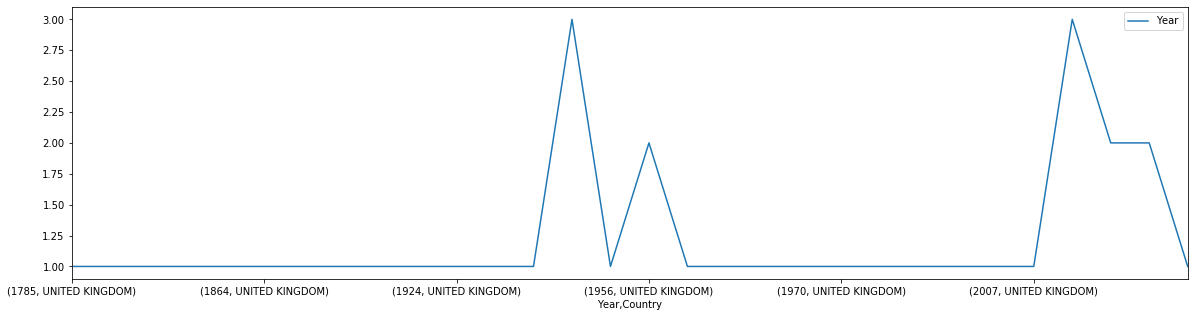

In [89]:
#As an example, this is one of the TOP20 Developed Countries with larger number of attacks.

High=shark_output[shark_output['Country'].eq('UNITED KINGDOM')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line(figsize=(20,5));

,,Year
Year,Country,
1945,HONG KONG,1
1954,HONG KONG,2
1971,HONG KONG,1
1973,HONG KONG,2
1974,HONG KONG,4
1975,HONG KONG,1
1976,HONG KONG,1
1979,HONG KONG,2
1991,HONG KONG,3


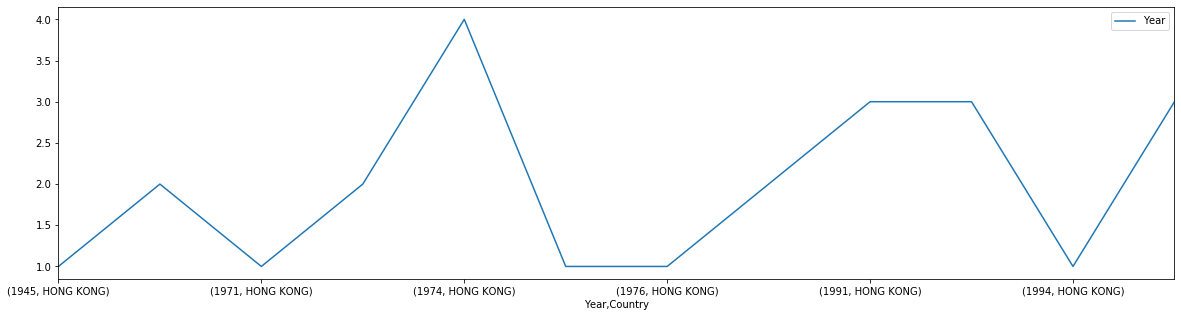

In [90]:
#As an example, this is one of the TOP20 Developed Countries with larger number of attacks.

High=shark_output[shark_output['Country'].eq('HONG KONG')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)
gr_df.plot.line(figsize=(20,5));

,,Year
Year,Country,
1788,AUSTRALIA,1
1791,AUSTRALIA,1
1803,AUSTRALIA,1
1804,AUSTRALIA,1
1807,AUSTRALIA,1
...,...,...
2013,AUSTRALIA,20
2014,AUSTRALIA,29
2015,AUSTRALIA,30


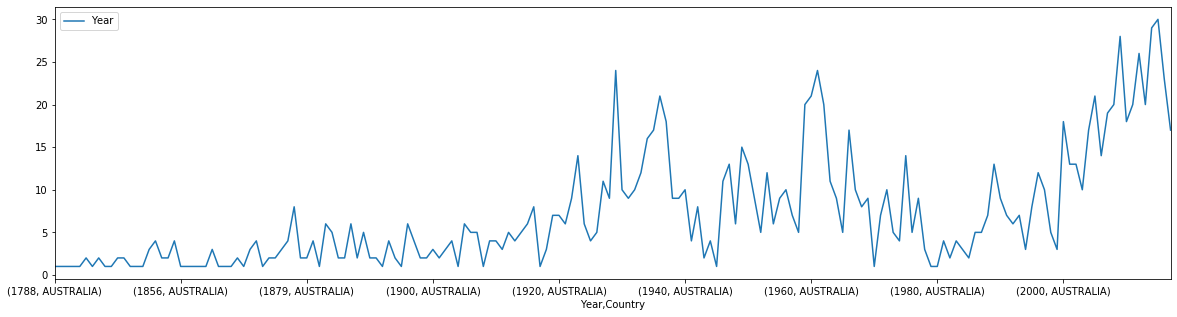

In [91]:
#As an example, this is one of the TOP20 Developed Countries with larger number of attacks.

High=shark_output[shark_output['Country'].eq('AUSTRALIA')]
gr_df = High.groupby(['Year','Country']).agg({"Year":"count"})
gr_df

display(gr_df)
gr_df.plot.line(figsize=(20,5));

Year
Year         Country             
1733         ICELAND            1
1755         SWEDEN             1
1785         UNITED KINGDOM     1
1788         AUSTRALIA          1
1791         AUSTRALIA          1
...                           ...
2016         JAPAN              1
             NEW ZEALAND        1
OUT OF SCOPE AUSTRALIA         17
             NEW ZEALAND        1
             SINGAPORE          1

[325 rows x 1 columns]

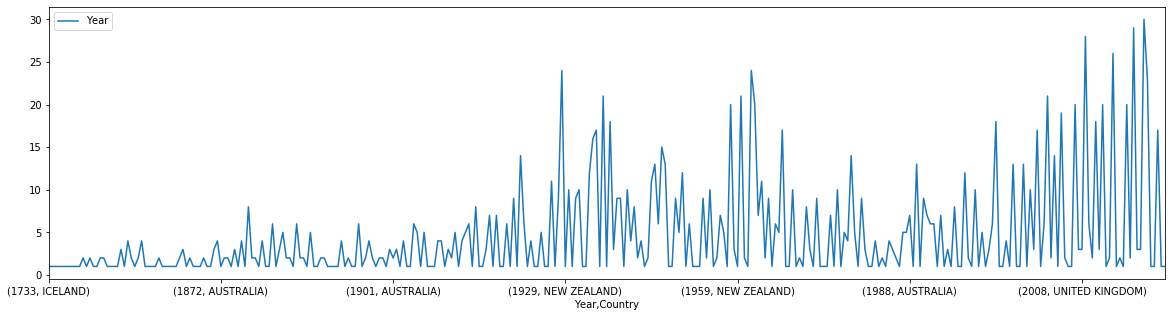

In [93]:
#Overall global correlation between Years, Countries and the number of attacks.
shark_output1=shark_output[shark_output.Country.isin(Dev)]
gr_df = shark_output1.groupby(['Year','Country']).agg({"Year":"count"})

display(gr_df)
gr_df.plot.line(figsize=(20,5));